In [2]:
import pandas as pd

In [3]:
# I will make an analysis in marketing dataset through this notebook
marketing = pd.read_csv("marketing.csv")

In [4]:
#getting the first 5 rows
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
0,a100000029,1/1/18,House Ads,personalization,True,English,English,0-18 years,1/1/18,NaN,House Ads,True
1,a100000030,1/1/18,House Ads,personalization,True,English,English,19-24 years,1/1/18,NaN,House Ads,True
2,a100000031,1/1/18,House Ads,personalization,True,English,English,24-30 years,1/1/18,NaN,House Ads,True
3,a100000032,1/1/18,House Ads,personalization,True,English,English,30-36 years,1/1/18,NaN,House Ads,True
4,a100000033,1/1/18,House Ads,personalization,True,English,English,36-45 years,1/1/18,NaN,House Ads,True


In [5]:
# Let's look at the columns with description
marketing.describe()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained
count,10037,10021,10022,10037,10022,10037,10037,10037,1856,577,1856,1856
unique,7309,31,5,2,2,4,4,7,31,115,5,2
top,a100000882,1/15/18,House Ads,control,False,English,English,19-24 years,1/16/18,4/2/18,Instagram,True
freq,12,789,4733,5091,8946,9793,9275,1682,163,15,600,1279


In [6]:
# for column's data type, all data types are object
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10037 entries, 0 to 10036
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   user_id              10037 non-null  object
 1   date_served          10021 non-null  object
 2   marketing_channel    10022 non-null  object
 3   variant              10037 non-null  object
 4   converted            10022 non-null  object
 5   language_displayed   10037 non-null  object
 6   language_preferred   10037 non-null  object
 7   age_group            10037 non-null  object
 8   date_subscribed      1856 non-null   object
 9   date_canceled        577 non-null    object
 10  subscribing_channel  1856 non-null   object
 11  is_retained          1856 non-null   object
dtypes: object(12)
memory usage: 941.1+ KB


In [7]:
# after looking data types we need to convert "is_retained" data type into boolean
# data type is object
marketing["is_retained"].dtype

dtype('O')

In [8]:
#Let's convert it to boolean
marketing["is_retained"] = marketing["is_retained"].astype("bool")
marketing["is_retained"].dtype

dtype('bool')

In [9]:
marketing["is_retained"].unique()

array([ True, False])

In [10]:
# sometimes we need to add columns to dataset deriving from the existed ones
#lets define a dictionary
channel_dict = {"House Ads": 1, "Instagram":2, "Facebook":3, "Email":4, "Push":5}

In [11]:
#using dictionary lets map channel into channel code
marketing["channel_code"]= marketing["subscribing_channel"].map(channel_dict)

In [12]:
#Let's add another column into dataset
import numpy as np
marketing["is_correct_lang"] = np.where(marketing["language_preferred"]==marketing["language_displayed"], "Yes", "No")


In [13]:
marketing["is_correct_lang"].unique()

array(['Yes', 'No'], dtype=object)

In [14]:
marketing["date_subscribed"]=pd.to_datetime(marketing["date_subscribed"])
marketing["date_canceled"]=pd.to_datetime(marketing["date_canceled"])
marketing["date_served"]=pd.to_datetime(marketing["date_served"])

In [15]:
#lets add day of week to the dataset
marketing["DoW"] = marketing["date_subscribed"].dt.dayofweek

In [16]:
marketing["DoW"].unique()

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6., nan])

In [17]:
# let's look at the daily marketing reach by channel
daily_users = marketing.groupby(marketing["date_served"])["user_id"].nunique()
daily_users.head()

date_served
2018-01-01    362
2018-01-02    374
2018-01-03    348
2018-01-04    323
2018-01-05    319
Name: user_id, dtype: int64

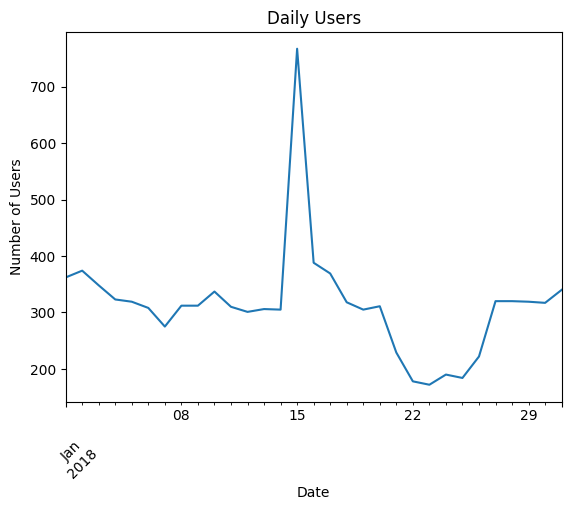

In [18]:
# Lets plot daily_users
import matplotlib.pyplot as plt
daily_users.plot()

plt.title("Daily Users")
plt.xlabel("Date")
plt.ylabel("Number of Users")

plt.xticks(rotation=45)


plt.show()

In [19]:
# Using common marketing metrics lets investigate marketing dataset
# for marketing campaign succes metrics is conversion rate, retention rate etc
total_users = marketing["user_id"].nunique() # to find total unique users
subscribers = marketing[marketing["converted"]==True]["user_id"].nunique() # to find converted users(subscribers)

conversion_rate = subscribers/total_users
print(round(conversion_rate*100,2))

13.89


In [20]:
# Lets calculate retention rate
#retention rate is #of people who remain subscribed/ total #of people converted

total_subscribers = marketing[marketing["converted"]==True]["user_id"].nunique()
retained = marketing[marketing["is_retained"]==True]["user_id"].nunique()


retention_rate = retained/total_subscribers
print(round(retention_rate,2))


6.86


In [21]:
# above we just looked at the conversion rate overall
# but to get an insgith we need to deep dive like age,gender, location, marketing channels user interacted with

In [22]:
#lets look at the conversion rate of language speakers
english_speakers = marketing[marketing["language_displayed"]=="English"]

total = english_speakers["user_id"].nunique()
subscribers = english_speakers[english_speakers["converted"]==True]["user_id"].nunique()

conversion_rate_eng = subscribers / total
print(round(conversion_rate_eng*100,2))

12.92


In [23]:
#We looked at the conversion rate of english speakers lets now look at the whole languages' cr
total_ld = marketing.groupby("language_displayed")["user_id"].nunique()
subscriber_ld = marketing[marketing["converted"]==True].groupby("language_displayed")["user_id"].nunique()

language_cr = subscriber_ld / total_ld
print(round(language_cr*100,2))

language_displayed
Arabic     50.00
English    12.92
German     71.62
Spanish    20.00
Name: user_id, dtype: float64


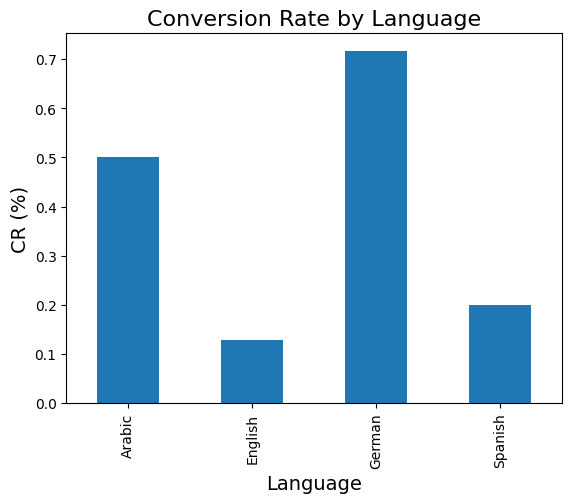

In [24]:
import matplotlib.pyplot as plt

language_cr.plot(kind="bar")

plt.title("Conversion Rate by Language", size=16)
plt.xlabel("Language", size=14)
plt.ylabel("CR (%)", size=14)

plt.show()


In [25]:
# now lets look at conversion rate daily to see if there are any 
total_daily = marketing.groupby("date_served")["user_id"].nunique()
converted_daily = marketing[marketing["converted"]==True]["user_id"].nunique()

cr_Daily = converted_daily/total_daily
cr_Daily

date_served
2018-01-01    2.803867
2018-01-02    2.713904
2018-01-03    2.916667
2018-01-04    3.142415
2018-01-05    3.181818
2018-01-06    3.295455
2018-01-07    3.690909
2018-01-08    3.253205
2018-01-09    3.253205
2018-01-10    3.011869
2018-01-11    3.274194
2018-01-12    3.372093
2018-01-13    3.316993
2018-01-14    3.327869
2018-01-15    1.323338
2018-01-16    2.615979
2018-01-17    2.750678
2018-01-18    3.191824
2018-01-19    3.327869
2018-01-20    3.263666
2018-01-21    4.432314
2018-01-22    5.702247
2018-01-23    5.901163
2018-01-24    5.342105
2018-01-25    5.516304
2018-01-26    4.572072
2018-01-27    3.171875
2018-01-28    3.171875
2018-01-29    3.181818
2018-01-30    3.201893
2018-01-31    2.985294
Name: user_id, dtype: float64

In [26]:
# above it is seen that avg cr is approximately around 3, so 5% cr is high, in these situations to understand what is happened look data deeply

In [27]:
cr_Daily = pd.DataFrame(cr_Daily.reset_index(0))
cr_Daily.columns = ['date_served', 'conversion_rate']

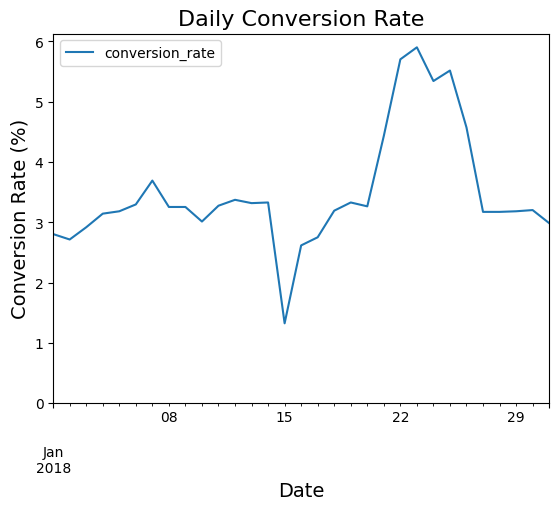

In [28]:
# Lets visualize it
cr_Daily.plot("date_served", "conversion_rate")

plt.title("Daily Conversion Rate", size=16)
plt.ylabel("Conversion Rate (%)", size=14)
plt.xlabel("Date", size=14)

plt.ylim(0) # to start from 0

plt.show()

In [29]:
# now it is much easier to investigate peaks or lowest points

In [30]:
# some marketing stakeholders wnt to know if their marketing channels are reaching all users equally

channel_age = marketing.groupby(["marketing_channel","age_group"])["user_id"].count()
channel_age


marketing_channel  age_group  
Email              0-18 years      93
                   19-24 years    111
                   24-30 years    120
                   30-36 years     60
                   36-45 years     63
                   45-55 years     65
                   55+ years       53
Facebook           0-18 years     264
                   19-24 years    347
                   24-30 years    296
                   30-36 years    249
                   36-45 years    226
                   45-55 years    299
                   55+ years      179
House Ads          0-18 years     694
                   19-24 years    761
                   24-30 years    681
                   30-36 years    699
                   36-45 years    589
                   45-55 years    678
                   55+ years      631
Instagram          0-18 years     300
                   19-24 years    315
                   24-30 years    286
                   30-36 years    259
                   

In [31]:
#convert into pd dataframe
channel_age_df = pd.DataFrame(channel_age.unstack(level=1))
# we did this to easily visualize it

channel_age_df

age_group,0-18 years,19-24 years,24-30 years,30-36 years,36-45 years,45-55 years,55+ years
marketing_channel,,,,,,,
Email,93,111,120,60,63,65,53
Facebook,264,347,296,249,226,299,179
House Ads,694,761,681,699,589,678,631
Instagram,300,315,286,259,280,227,204
Push,186,145,183,86,193,82,118


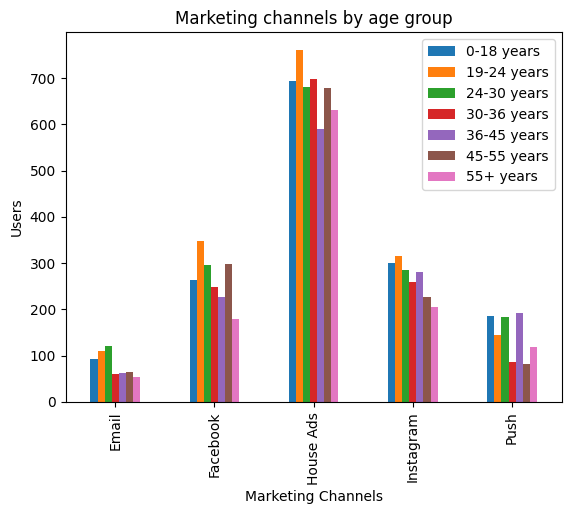

In [32]:
channel_age_df.plot(kind="bar")
plt.title("Marketing channels by age group")
plt.xlabel("Marketing Channels")
plt.ylabel("Users")

plt.legend(loc="upper right",
          labels=channel_age_df.columns.values)

Now lets look at whose channel had the best retention rate

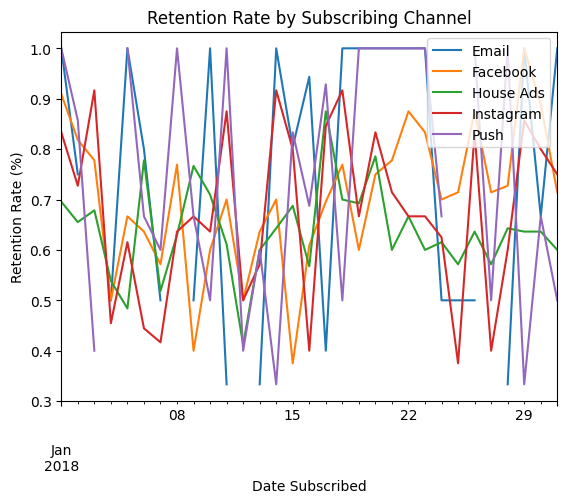

In [33]:
retention_total = marketing.groupby(["date_subscribed", "marketing_channel"])["user_id"].nunique()

retention_subsc = marketing[marketing["is_retained"]==True].groupby(["date_subscribed", "marketing_channel"])["user_id"].nunique()

retention_rate_new = retention_subsc/retention_total
retention_rate_df = pd.DataFrame(retention_rate_new.unstack(level=1))

retention_rate_df.plot()
plt.title("Retention Rate by Subscribing Channel")
plt.xlabel("Date Subscribed")
plt.ylabel("Retention Rate (%)")
plt.legend(loc="upper right", labels=retention_rate_df.columns.values)

plt.show()

Building a Conversion Function

In [34]:
 def conversion_rate(dataframe, column_names):
        # total number of converted users
        converted = dataframe[dataframe["converted"]==True].groupby(column_names)["user_id"].nunique()
        total_users = dataframe.groupby(column_names)["user_id"].nunique()
        conversion_rate = converted/total_users
        #if there are null values fill with 0
        conversion_rate.fillna(0)
        #conversion_rate = round(conversion_rate*100,2)
        return conversion_rate

In [35]:
conversion_rate(marketing, "marketing_channel")

marketing_channel
Email        0.338156
Facebook     0.125711
House Ads    0.075101
Instagram    0.133333
Push         0.079218
Name: user_id, dtype: float64

In [36]:
# when we need to group with 2 dimensions

age_group_cr = conversion_rate(marketing, ["date_served","age_group"])
age_group_cr.head()

date_served  age_group  
2018-01-01   0-18 years     0.155172
             19-24 years    0.196721
             24-30 years    0.105263
             30-36 years    0.040816
             36-45 years    0.042553
Name: user_id, dtype: float64

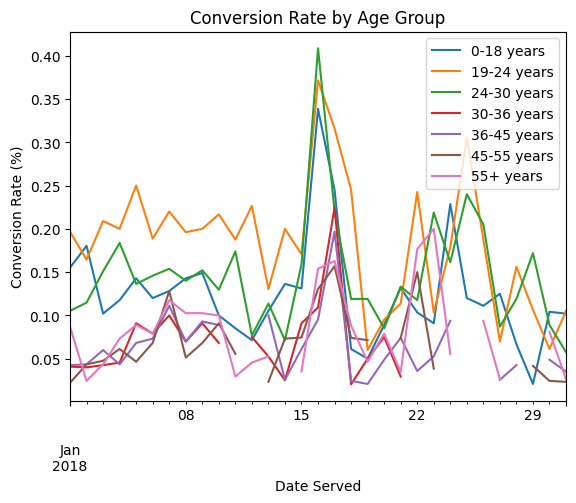

In [37]:
# Since it has 2 dimensions before viz lets unstack dataframe
age_group_df = pd.DataFrame(age_group_cr.unstack(level=1))
age_group_df.plot()

plt.title("Conversion Rate by Age Group")
plt.xlabel("Date Served")
plt.ylabel("Conversion Rate (%)")
plt.legend(loc="upper right")
plt.show()

In [38]:
# Now lets create plotting function
def plot_conversion(dataframe):
    
    for column in dataframe:
        plt.plot(dataframe.index, dataframe[column])
    plt.title("Daily " + str(column) + " conversion rate", size=16)
    plt.ylabel("Conversion Rate (%)", size=10)
    plt.xlabel("Date", size=10)
    plt.xticks(rotation=45)
    plt.show()
    plt.clf()

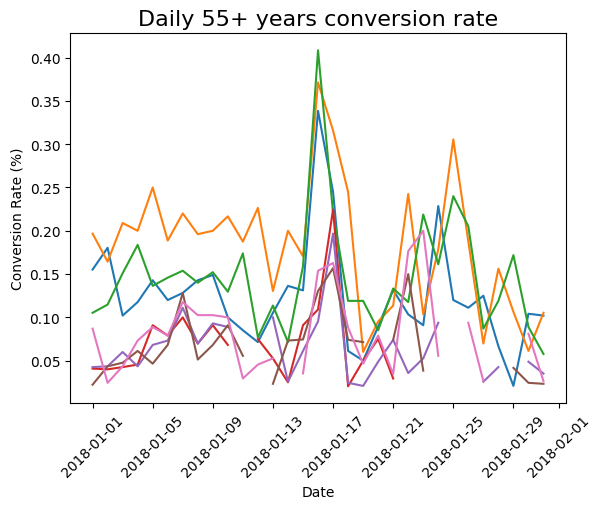

<Figure size 640x480 with 0 Axes>

In [39]:
# Lets put it together
age_group_cr_new = conversion_rate(marketing, ["date_served", "age_group"])
age_group_df_new = pd.DataFrame(age_group_cr_new.unstack(level=1))

plot_conversion(age_group_df_new)


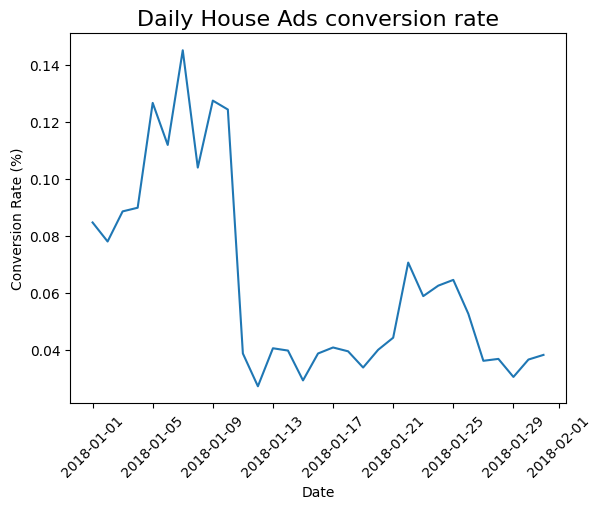

<Figure size 640x480 with 0 Axes>

In [40]:
#Look at marketing channel and date
daily_cr = conversion_rate(marketing[marketing["marketing_channel"]=="House Ads"], ["date_served", "marketing_channel"])
daily_cr = pd.DataFrame(daily_cr.unstack(level=1))

#plotting
plot_conversion(daily_cr)

In [41]:
# now we've seen that house ads conversion has been down since January 11
# let's look at the data deeply
#lets add day of week to data as column
marketing["DoW_served"] = marketing["date_served"].dt.dayofweek

In [42]:
# no lets calculate the conversion rate by day of week
DoW_Conversion = conversion_rate(marketing, ["DoW_served", "marketing_channel"])
DoW_Conversion

DoW_served  marketing_channel
0.0         Email                0.162621
            Facebook             0.119601
            House Ads            0.062660
            Instagram            0.122517
            Push                 0.064516
1.0         Email                0.906250
            Facebook             0.147887
            House Ads            0.070312
            Instagram            0.151943
            Push                 0.115854
2.0         Email                0.837209
            Facebook             0.127036
            House Ads            0.075269
            Instagram            0.150160
            Push                 0.105882
3.0         Email                0.727273
            Facebook             0.133333
            House Ads            0.059034
            Instagram            0.143498
            Push                 0.067797
4.0         Email                0.666667
            Facebook             0.110132
            House Ads            0.062278
    

In [43]:
# we need to change this data to dataframe
DoW_df = pd.DataFrame(DoW_Conversion.unstack(level=1))
DoW_df

marketing_channel,Email,Facebook,House Ads,Instagram,Push
DoW_served,,,,,
0.0,0.162621,0.119601,0.062660,0.122517,0.064516
1.0,0.906250,0.147887,0.070312,0.151943,0.115854
2.0,0.837209,0.127036,0.075269,0.150160,0.105882
3.0,0.727273,0.133333,0.059034,0.143498,0.067797
4.0,0.666667,0.110132,0.062278,0.129870,0.055556
5.0,0.818182,0.109375,0.057566,0.088710,0.069767
6.0,0.750000,0.116071,0.065217,0.127193,0.065574


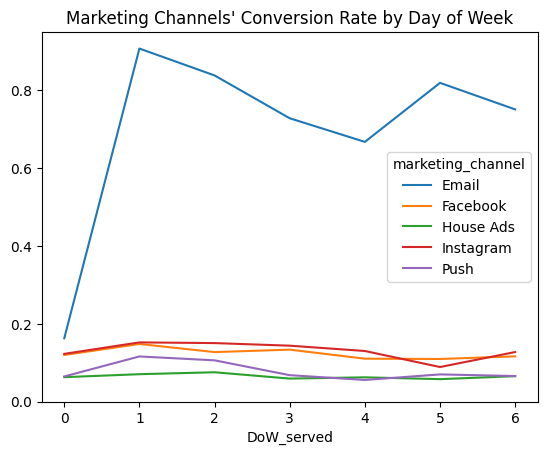

In [44]:
#plot this df to see clearly
DoW_df.plot()
plt.title("Marketing Channels' Conversion Rate by Day of Week")
plt.ylim(0)
plt.show()

In [45]:
marketing.head()

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
1,a100000030,2018-01-01,House Ads,personalization,True,English,English,19-24 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
2,a100000031,2018-01-01,House Ads,personalization,True,English,English,24-30 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
3,a100000032,2018-01-01,House Ads,personalization,True,English,English,30-36 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0
4,a100000033,2018-01-01,House Ads,personalization,True,English,English,36-45 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0


In [46]:
#lets create new dataframe to look deeply to house ads
house_ads = marketing[marketing["marketing_channel"]=="House Ads"]
house_ads.head(1)

,user_id,date_served,marketing_channel,variant,converted,language_displayed,language_preferred,age_group,date_subscribed,date_canceled,subscribing_channel,is_retained,channel_code,is_correct_lang,DoW,DoW_served
0,a100000029,2018-01-01,House Ads,personalization,True,English,English,0-18 years,2018-01-01,NaT,House Ads,True,1.0,Yes,0.0,0.0


In [47]:
#lets calculate cr of the House Ads channel
house_ads_cr = conversion_rate(house_ads, ["date_served","language_displayed"])
house_ads_cr.dtype

dtype('float64')

In [48]:
house_ads_df = pd.DataFrame(house_ads_cr.unstack(level=1))
house_ads_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 31 entries, 2018-01-01 to 2018-01-31
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Arabic   3 non-null      float64
 1   English  31 non-null     float64
 2   German   6 non-null      float64
 3   Spanish  8 non-null      float64
dtypes: float64(4)
memory usage: 1.2 KB


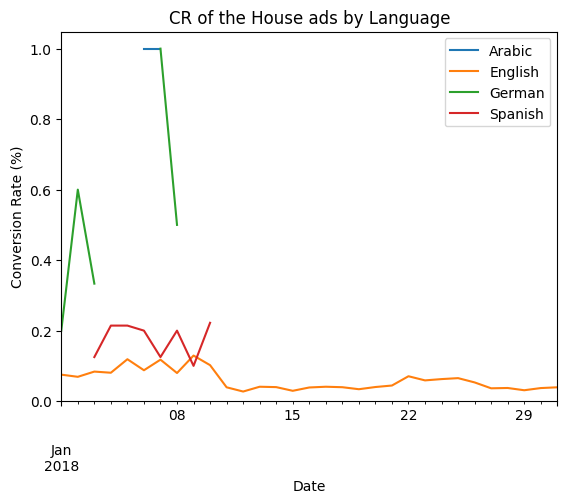

In [49]:
house_ads_df.plot()
plt.title("CR of the House ads by Language")
plt.ylim(0)
plt.ylabel("Conversion Rate (%)")
plt.xlabel("Date")
plt.legend(loc="upper right", labels=house_ads_df.columns.values)

plt.show()

In [50]:
# lets create new column for house ads
import numpy as np
house_ads["is_correct_lang"] = np.where(house_ads["language_displayed"]==house_ads["language_preferred"], "Yes", "No")

In [51]:
lang_check = house_ads.groupby(["date_served", "is_correct_lang"])["user_id"].count()
lang_check_df = pd.DataFrame(lang_check.unstack(level=1)).fillna(0) 

In [52]:
lang_check_df

is_correct_lang,No,Yes
date_served,,
2018-01-01,2.0,189.0
2018-01-02,3.0,247.0
2018-01-03,0.0,220.0
2018-01-04,0.0,168.0
2018-01-05,0.0,160.0
2018-01-06,1.0,151.0
2018-01-07,2.0,130.0
2018-01-08,0.0,154.0
2018-01-09,0.0,157.0


In [53]:
lang_check_df["pct"]= lang_check_df["Yes"]/lang_check_df.sum(axis=1)

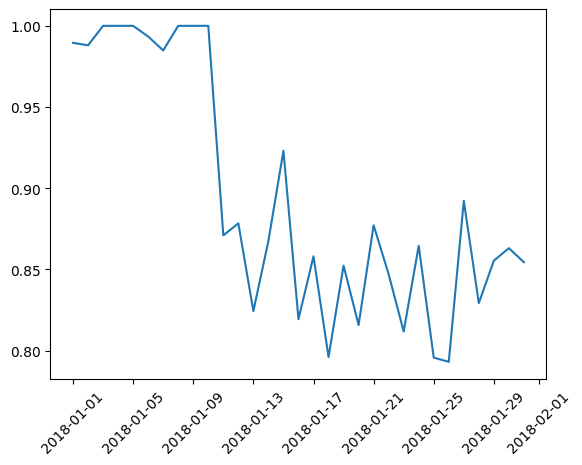

In [54]:
plt.plot(lang_check_df.index.values, lang_check_df["pct"])
#plt.figure(figsize=(30,10))
plt.xticks(rotation=45)
plt.show()

In [55]:
# since I've seen an error in the data I will look the data in between 01-01 and 11-01
house_ads_bug = house_ads[house_ads["date_served"]<"2018-01-11"]
#now lets deep dive in house_ads_bug, to look cr of the language
lang_conv = conversion_rate(house_ads_bug, ["language_displayed"])
lang_conv

language_displayed
Arabic     0.500000
English    0.099093
German     0.444444
Spanish    0.166667
Name: user_id, dtype: float64

In [56]:
# lets look all language's cr in terms of english
spanish_ratio = round(lang_conv["Spanish"]/lang_conv["English"],2)
arabic_ratio = round(lang_conv["Arabic"]/lang_conv["English"],2)
german_ratio = round(lang_conv["German"]/lang_conv["English"],2)

print("Spanish Ratio", spanish_ratio)
print("Arabic Ratio", arabic_ratio)
print("German Ratio", german_ratio)

Spanish Ratio 1.68
Arabic Ratio 5.05
German Ratio 4.49


In [57]:
converted = house_ads.groupby(["date_served", "language_preferred"]).agg({"user_id": "nunique", "converted": "sum"})
converted

user_id converted
date_served language_preferred                   
2018-01-01  Arabic                    2         2
            English                 171        13
            German                    5         1
            Spanish                  11         0
2018-01-02  Arabic                    3         0
...                                 ...       ...
2018-01-30  Spanish                  18         2
2018-01-31  Arabic                    7         1
            English                 130         4
            German                    4         0
            Spanish                  16         1

[119 rows x 2 columns]

In [58]:
converted.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 119 entries, (Timestamp('2018-01-01 00:00:00'), 'Arabic') to (Timestamp('2018-01-31 00:00:00'), 'Spanish')
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    119 non-null    int64 
 1   converted  119 non-null    object
dtypes: int64(1), object(1)
memory usage: 6.6+ KB


In [59]:
converted_df = pd.DataFrame(converted.unstack(level=1))
converted_df

user_id                 ... converted               
language_preferred  Arabic English German  ...   English German Spanish
date_served                                ...                         
2018-01-01             2.0   171.0    5.0  ...        13      1       0
2018-01-02             3.0   200.0    5.0  ...        14      3       0
2018-01-03             2.0   179.0    3.0  ...        15      1       1
2018-01-04             2.0   149.0    2.0  ...        12      0       3
2018-01-05             NaN   143.0    1.0  ...        17  False       3
2018-01-06             3.0   136.0    2.0  ...        12      0       2
2018-01-07             2.0   117.0    2.0  ...        14      2       1
2018-01-08             NaN   138.0    6.0  ...        11      3       2
2018-01-09             NaN   147.0    NaN  ...        19    NaN       1
2018-01-10             NaN   147.0    4.0  ...        15      2       4
2018-01-11             7.0   133.0    2.0  ...         6      0       0
2018-01-12             3.0   129.0    4.0  ...         3      0       1
2018-01-13             6.0   121.0    5.0  ...         5      1       0
2018-01-14             5.0   131.0    3.0  ...         6      0       0
2018-01-15             2.0   189.0    4.0  ...         6      0       0
2018-01-16             7.0   127.0    4.0  ...         6      0       0
2018-01-17             2.0   126.0    3.0  ...         2      0       4
2018-01-18             7.0   121.0    6.0  ...         5      1       0
2018-01-19             5.0   126.0    5.0  ...         4      0       0
2018-01-20             6.0   124.0    6.0  ...         4      1       0
2018-01-21             1.0    99.0    4.0  ...         5      0       0
2018-01-22             2.0    72.0    3.0  ...         4      1       0
2018-01-23             3.0    69.0    4.0  ...         5      0       0
2018-01-24             2.0    83.0    3.0  ...         6      0       0
2018-01-25             3.0    75.0    4.0  ...         4      2       0
2018-01-26             6.0    89.0    3.0  ...         4      0       2
2018-01-27             3.0   148.0    3.0  ...         4      0       1
2018-01-28             5.0   134.0    3.0  ...         4      0       2
2018-01-29             7.0   138.0    4.0  ...         3      0       0
2018-01-30             4.0   139.0    3.0  ...         4      0       2
2018-01-31             7.0   130.0    4.0  ...         4      0       1

[31 rows x 8 columns]

In [60]:
#lets add cr each by language
converted_df["english_cr"] = converted_df.loc["2018-01-11":"2018-01-31"][('converted','English')]

In [61]:
converted_df["expected_spanish_rate"] = converted_df["english_cr"] * spanish_ratio
converted_df["expected_arabic_rate"] = converted_df["english_cr"] * arabic_ratio
converted_df["expected_german_rate"] = converted_df["english_cr"] * german_ratio

# multiply number of users by the expected cr
converted_df["expected_spanish_conv"] = converted_df["expected_spanish_rate"]/100* converted_df[('user_id','Spanish')]
converted_df["expected_arabic_conv"] = converted_df["expected_arabic_rate"]/100* converted_df[('user_id','Arabic')]
converted_df["expected_german_conv"] = converted_df["expected_german_rate"]/100* converted_df[('user_id','German')]

In [62]:
# to look only relevant days
converted = converted.loc["2012-01-11":"2012-01-31"]

# sum expected subscribers for each lang
expected_subs = converted_df["expected_german_conv"].sum() + converted_df["expected_spanish_conv"].sum() + converted_df["expected_arabic_conv"].sum()

actual_subs = converted_df['converted','Spanish'].sum() + converted_df['converted','German'].sum() +converted_df['converted','Arabic'].sum()

lost_subs = expected_subs - actual_subs

print(lost_subs)

-3.8445999999999856


A/B Testing for Marketing
- Personalized email test
- Success metric is conversion rate


In [63]:
marketing["variant"].unique()

array(['personalization', 'control'], dtype=object)

In [64]:
# lets runn an a/b test on email 
email = marketing[marketing["marketing_channel"]=="Email"]

In [65]:
email_variant = email.groupby("variant")["user_id"].nunique()
email_variant

variant
control            270
personalization    284
Name: user_id, dtype: int64

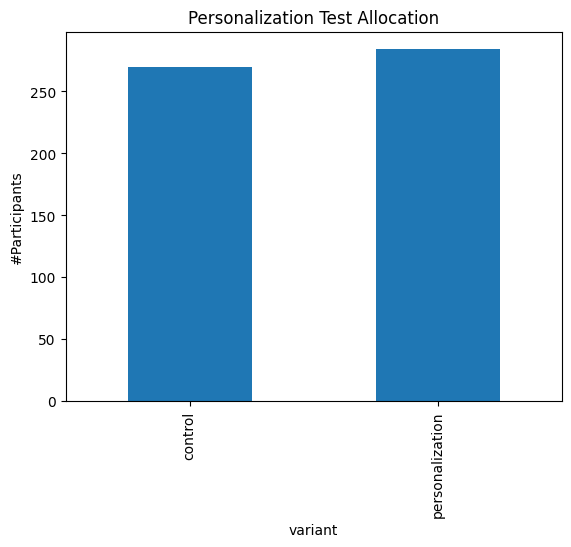

In [66]:
email_variant.plot(kind="bar")
plt.title("Personalization Test Allocation")
plt.ylabel("#Participants")
plt.show()

In [69]:
#lets create dataframe from email df by grouping user_id and variant column
subscribers = email.groupby(["user_id", "variant"])["converted"].max()
subscribe_df = pd.DataFrame(subscribers.unstack(level=1))
subscribe_df.head()

variant,control,personalization
user_id,,
a100000526,NaN,True
a100000530,NaN,True
a100000534,NaN,False
a100000538,NaN,True
a100000542,NaN,True


In [71]:
# lets drop na data 
control = subscribe_df["control"].dropna()
personalization = subscribe_df["personalization"].dropna()

In [73]:
control_mean = np.mean(control)

0.2814814814814815

In [75]:
personalization_mean = np.mean(personalization)
personalization_mean

0.3908450704225352

It is seen that personalization's cr is higher
- we need to look at **lift**(treatmen cr - Control cr)/Control cr 
- lets write an function to calculate lift, not to write a code over and over

In [77]:
def lift(control, test):
    mean_control = np.mean(control)
    mean_test = np.mean(test)
    
    lift = (mean_test-mean_control)/mean_control
    
    return str(round(lift*100,2))

In [79]:
lift(control, personalization)

'38.85'

In [111]:

from statsmodels.stats.weightstats import ttest_ind
ttest_ind(control, personalization)
# threshold for a statistically significant when p is less than 0.05
# since p value is less than 0.05 it is significant

(-2.7343299447505074, 0.006451487844694175, 552.0)

In [89]:
# we sometimes see signicant difference between two groups but also it is important to look at the segmentation
# I will create an function to look at the segments

In [112]:
def ab_segmentation(segment):
    
    for i in np.unique(marketing[segment].values):
        print(i)
        
        email = marketing[(marketing["marketing_channel"]=="Email") & (marketing[segment]==i)]
        
        subscribers = email.groupby(["user_id","variant"])["converted"].max()
        subscribers = pd.DataFrame(subscribers.unstack(level=1))
        control = subscribers["control"].dropna()
        personalization = subscribers["personalization"].dropna()
        
        print('lift:', lift(control, personalization))
        print('t-statistic:', ttest_ind(control, personalization))

In [113]:
ab_segmentation("language_displayed")

Arabic
lift: 50.0
t-statistic: (-0.5773502691896255, 0.5795840000000001, 8.0)
English
lift: 39.0
t-statistic: (-2.2183598646203166, 0.026991701290720815, 486.0)
German
lift: -1.62
t-statistic: (0.19100834180787177, 0.8494394170062678, 42.0)
Spanish
lift: 166.67
t-statistic: (-2.3570226039551585, 0.040156718110477524, 10.0)


In [114]:
ab_segmentation("age_group")

0-18 years
lift: 121.4
t-statistic: (-2.966044912142211, 0.0038724494391297226, 89.0)
19-24 years
lift: 106.24
t-statistic: (-3.03179438478667, 0.0030623836114689134, 105.0)
24-30 years
lift: 161.19
t-statistic: (-3.861539544326876, 0.00018743381094867337, 114.0)
30-36 years
lift: -100.0
t-statistic: (3.1859064644147996, 0.0023238487431765137, 58.0)
36-45 years
lift: -85.23
t-statistic: (2.4317901279318503, 0.01797568600978829, 61.0)
45-55 years
lift: -72.22
t-statistic: (2.065499127317933, 0.043062339688201196, 62.0)
55+ years
lift: -100.0
t-statistic: (3.3265654564203397, 0.0016358623456360435, 51.0)
